## Load Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
train = pd.read_csv('FIFA_train.csv')
test = pd.read_csv('FIFA_test.csv')

train_id = train.id
test_id = test.id

All_df = pd.concat([train, test], axis = 0)

C:\Users\sdj48\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


In [3]:
# 12760개의 행과, 12개의 열
# 결측치 없다.
print(All_df.shape, train.shape, test.shape)
print(All_df.isna().sum(axis = 0))

(12760, 12) (8932, 12) (3828, 11)
age                    0
continent              0
contract_until         0
id                     0
name                   0
position               0
prefer_foot            0
reputation             0
stat_overall           0
stat_potential         0
stat_skill_moves       0
value               3828
dtype: int64


In [4]:
#head , describe, data type
display(All_df.head()), display(All_df.describe()), All_df.info()

,age,continent,contract_until,id,name,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,31,south america,2021,0,L. Messi,ST,left,5.0,94,94,4.0,110500000.0
1,27,europe,2020,3,De Gea,GK,right,4.0,91,93,1.0,72000000.0
2,31,south america,2021,7,L. Suárez,ST,right,5.0,91,91,3.0,80000000.0
3,32,europe,2020,8,Sergio Ramos,DF,right,4.0,91,91,3.0,51000000.0
4,25,europe,2021,9,J. Oblak,GK,right,3.0,90,93,1.0,68000000.0


,age,id,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,12760.000000,8.932000e+03
mean,25.235737,7930.620455,1.134796,67.164890,72.030329,2.405643,2.778673e+06
std,4.633329,4852.339667,0.431366,6.871778,6.032070,0.777576,5.840982e+06
min,16.000000,0.000000,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,22.000000,3689.750000,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,25.000000,7681.500000,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,28.250000,12049.250000,1.000000,72.000000,76.000000,3.000000,2.600000e+06
max,42.000000,16948.000000,5.000000,94.000000,95.000000,5.000000,1.105000e+08


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12760 entries, 0 to 3827
Data columns (total 12 columns):
age                 12760 non-null int64
continent           12760 non-null object
contract_until      12760 non-null object
id                  12760 non-null int64
name                12760 non-null object
position            12760 non-null object
prefer_foot         12760 non-null object
reputation          12760 non-null float64
stat_overall        12760 non-null int64
stat_potential      12760 non-null int64
stat_skill_moves    12760 non-null float64
value               8932 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.3+ MB


(None, None, None)

### Object Data check

object type의 feature에 어떤 값이 있는지 확인해봤다.  
- contract_until 의 형식이 통일 되지 않은것 같다. 추후에 따로 처리할 필요 있다.

In [5]:
#All_df.drop(['name', 'id'], axis = 1, inplace = True)

string_data = All_df.select_dtypes(include = ['object'])

for col in string_data.columns:
    print('Unique values for {0}:\n{1}\n'.format(col, string_data[col].unique()))

Unique values for continent:
['south america' 'europe' 'africa' 'asia' 'oceania']

Unique values for contract_until:
['2021' '2020' '2019' '2023' '2022' '2024' 'Jun 30, 2019' '2026'
 'Dec 31, 2018' '2018' '2025' 'Jun 30, 2020' 'May 31, 2020' 'May 31, 2019'
 'Jan 31, 2019' 'Jan 1, 2019' 'Jan 12, 2019' 'Dec 31, 2019' 'Jun 1, 2019']

Unique values for name:
['L. Messi' 'De Gea' 'L. Suárez' ... 'Y. Góez' 'A. Kaltner' 'K. Fujikawa']

Unique values for position:
['ST' 'GK' 'DF' 'MF']

Unique values for prefer_foot:
['left' 'right']



### contract_until  
계약기간을 보면 연도만 적혀진 선수와 월, 일, 연으로 적힌 선수가 있다. 계약기간의 표현을 연도를 기준으로 통일시킨다.  
1~6월은 그 해당년도로 7~12월은 그 해당년도의 다음년도로 연도를 계산할것이다.

In [6]:
def contract_year(cols):
    if len(cols) == 4:
        return int(cols)
    elif any(ext in cols for ext in ['Jan','Feb','Mar','Apr',"May","Jun"]):
        return int(cols[-4:])
    elif any(ext in cols for ext in ['Jul','Aug','Sep','Oct',"Nov","Dec"]):
        return int(cols[-4:]) +1

All_df.contract_until = All_df.contract_until.apply(contract_year)

## Visualization

### Value VS other features

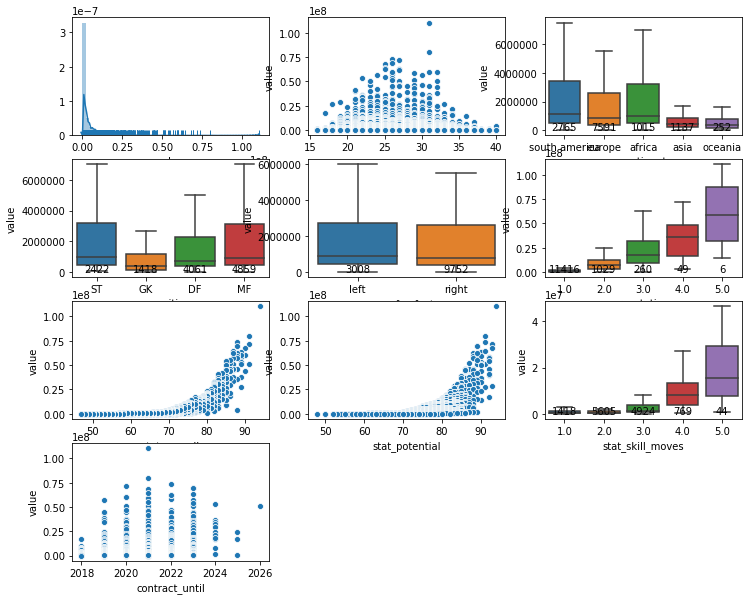

In [7]:
warnings.filterwarnings(action = 'ignore')
warnings.filterwarnings(action="ignore")
plt.figure(figsize=[12,10])
plt.subplot(4,3,1)
sns.distplot(All_df.dropna(subset = ['value']).value, kde=True, rug=True)

plt.subplot(4,3,2)
sns.scatterplot(x='age', y = 'value', data = All_df)

plt.subplot(4,3,3)
g = sns.boxplot(x = 'continent', y = 'value', data = All_df, showfliers=False)
for a,b in enumerate(pd.DataFrame(All_df.groupby('continent').continent.count()).reindex(All_df.continent.unique()).values):
    g.text(a, 0, b[0],  color='black', ha = "center")

plt.subplot(4,3,4)
g = sns.boxplot(x = 'position', y = 'value', data = All_df, showfliers=False)
for a,b in enumerate(pd.DataFrame(All_df.groupby('position').position.count()).reindex(All_df.position.unique()).values):
    g.text(a, 0, b[0],  color='black', ha = "center")

plt.subplot(4,3,5)

g = sns.boxplot(x = 'prefer_foot', y = 'value', data = All_df, showfliers=False)
for a,b in enumerate(pd.DataFrame(All_df.groupby('prefer_foot').prefer_foot.count()).reindex(All_df.prefer_foot.unique()).values):
    g.text(a, 0, b[0],  color='black', ha = "center")

plt.subplot(4,3,6)
g = sns.boxplot(x = 'reputation', y = 'value', data = All_df, showfliers=False)
for a,b in enumerate(pd.DataFrame(All_df.groupby('reputation').reputation.count()).values):
    g.text(a, 0, b[0],  color='black', ha = "center")

plt.subplot(4,3,7)
sns.scatterplot(x = 'stat_overall',y='value', data = All_df)

plt.subplot(4,3,8)
sns.scatterplot(x = 'stat_potential',y='value',  data = All_df)

plt.subplot(4,3,9)
g = sns.boxplot(x = 'stat_skill_moves', y = 'value', data = All_df, showfliers=False)
for a,b in enumerate(pd.DataFrame(All_df.groupby('stat_skill_moves').stat_skill_moves.count()).values):
    g.text(a, 0, b[0],  color='black', ha = "center")

plt.subplot(4,3,10)
sns.scatterplot(x = 'contract_until', y = 'value', data = All_df)
plt.show()

* Value값의 분포는 상당히 치우쳐져있다
* 20대 중후반 선수들의 이적료가 많이 높다.
* 아시아, 오세아니아의 경우 남아메리카, 아프리카, 유럽선수들에 비해 이적료가 낮다. 유럽선수가 대부분을 차지한다.
* GK는 다른 포지션에 비해 이적료가 낮고 그 뒤로는 DF가 낮고 MF,ST는 비슷해 보인다.
* reputation & stat_skill_moves가 높을 수록 이적료 높아보인다
* stat_overall과 stat_potential은 비슷한 분포를 보이고 70중반까지는 다 고만고만하나 그 뒤로는 이적료에 대한 관계가 지수적으로 커지는것 같다.
* 계약기간이 2018년인 선수들의 이적료가 낮게 측정된것을 보인다.  

위의 내용들은 간단하게 그려본 그래프의 결론일뿐 더 많은 visualization을 한 뒤 결론을 내야 한다.

### Correlation 

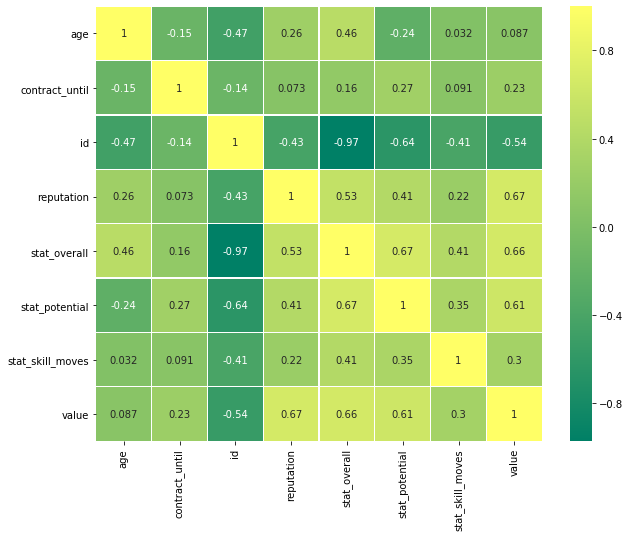

In [8]:
sns.heatmap(All_df.corr(),annot=True,cmap='summer',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Value

데이터가 치우쳐져있는 경우 log 변환을 통해 데이터의 분포문제를 해결하고 예측의 정확도를 개선시킬 수 있다.  
따라서 log변환 고려해 본다.

In [9]:
import math

In [10]:
All_df['value2'] = np.nan
All_df['value2'][:len(All_df.dropna(subset = ['value']).value.apply(math.log10))] = All_df.dropna(subset = ['value']).value.apply(math.log10)

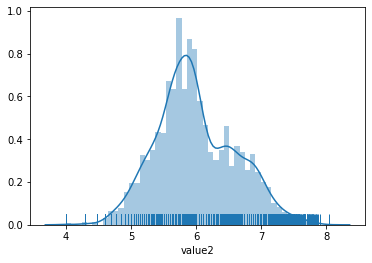

In [11]:
sns.distplot(All_df.dropna(subset = ['value']).value2, kde=True, rug=True)
plt.show()

### stat_overall & stat_potential  
stat_potenstial은 stat_overall보다 같거나 크다.

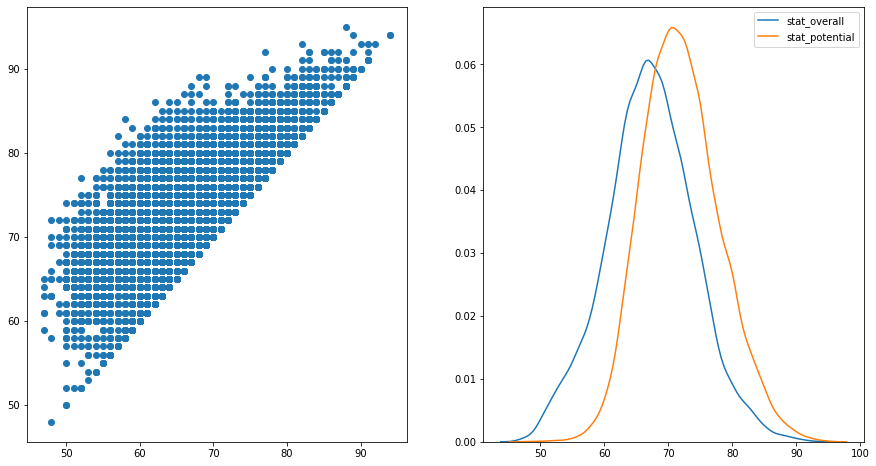

In [12]:
plt.figure(figsize = [15,8])
plt.subplot(1,2,1)
plt.plot(All_df.stat_overall, All_df.stat_potential, 'o')
plt.subplot(1,2,2)
sns.kdeplot(All_df.stat_overall, label = 'stat_overall')
sns.kdeplot(All_df.stat_potential, label = 'stat_potential')
plt.show()

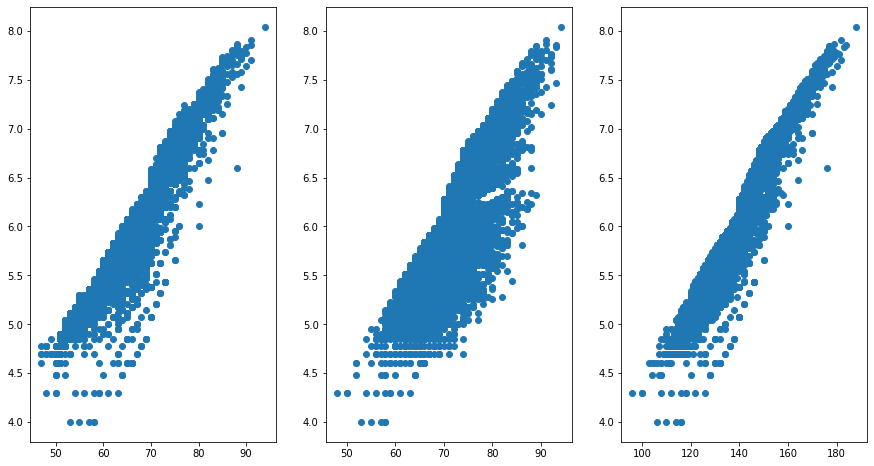

In [13]:
plt.figure(figsize = [15,8])
plt.subplot(1,3,1)
plt.plot(All_df.stat_overall, All_df.value2, 'o')
plt.subplot(1,3,2)
plt.plot(All_df.stat_potential, All_df.value2, 'o')
plt.subplot(1,3,3)
plt.plot(All_df.stat_potential+All_df.stat_overall, All_df.value2, 'o')
plt.show()

### Age  
20대 중후반 부터 30대초에 이적료가 가장 높다.  
나이별로 20대 중후반 되면 stat_overall이 커진다.

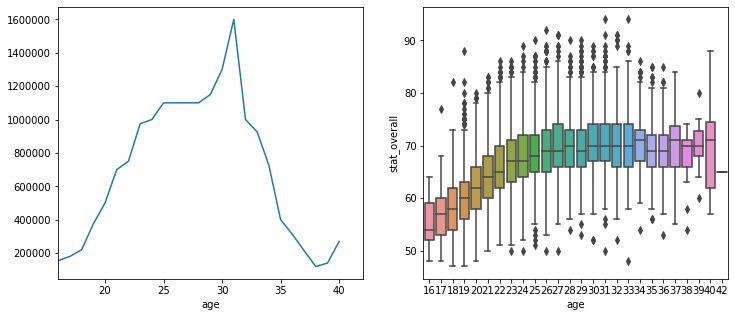

In [14]:
plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
All_df.groupby('age').value.median().plot()
plt.subplot(1,2,2)
sns.boxplot(x = 'age', y = 'stat_overall', data = All_df)
plt.show()

대부분의 선수가 reputation 1~2에 해당하고 3,4,5로 갈수록 그 수가 극히 적어진다.  
그리고 reputation이 4이상인 선수들은 20대 중반에서 30대 중후반 선수들이다.  

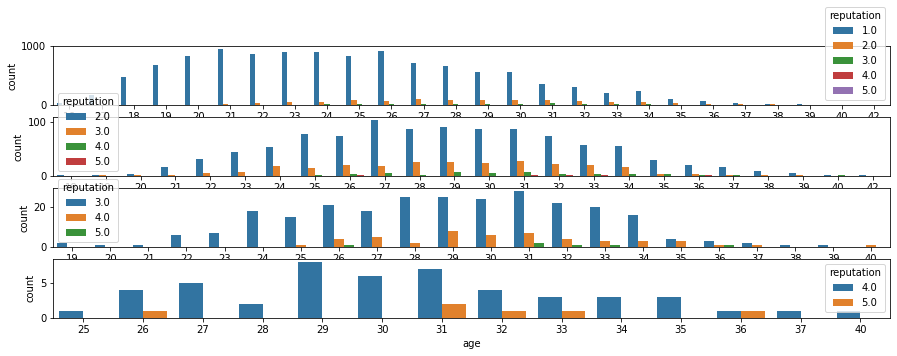

In [15]:
plt.figure(figsize=[15,5])
for i in range(1,5):
    plt.subplot(4,1,i)
    sns.countplot(x = 'age', hue = 'reputation', data=All_df.loc[All_df.reputation >=i])
plt.show()

### Continent  
1) stat_overall 의 경우는 **oceania, asia**가 다른 대륙에 비해 낮은 overall을 가진 선수의 비율이 많았다. **south america와 africa**는 다른 대륙에 비해 높은 stat_overall을 가진 선수의 비율이 좀 더 컸다 .

2) reputation의 경우 **asia와 afreeca , oceania** 는 4이상의 reputation을 가진 선수가 없고 **south america와 europe**만 4~5 reputaion의 값을 보였다.

3) stat_skill_moves가 5인 선수들은 극히 드물었고 전체적으로 2~3 수준의 선수들이 많았다.

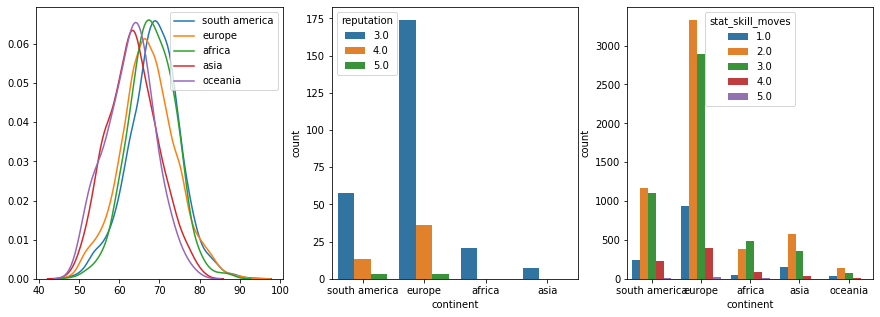

In [16]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
for i in All_df.continent.unique():
    sns.kdeplot(All_df.loc[All_df.continent == i].stat_overall, label = i)
    
plt.subplot(1,3,2)
sns.countplot(x = 'continent',hue ='reputation', data = All_df.loc[All_df.reputation > 2])

plt.subplot(1,3,3)
sns.countplot(x = 'continent',hue ='stat_skill_moves', data = All_df)

plt.show()

### Position
1) 포지션 별로 stat_ovreall은 GK에서 낮은 선수들의 비율이 높았다.  
2) reputation이 5인 선수들은 ST, GK에서 보였다.  
3) position별로 stat_skill_moves의 값은 GK의 경우 다 1이었고 DF 경우 주로 2~3값을 가졌으며 4이상의 값은 MF, ST에서 주로 보였다.

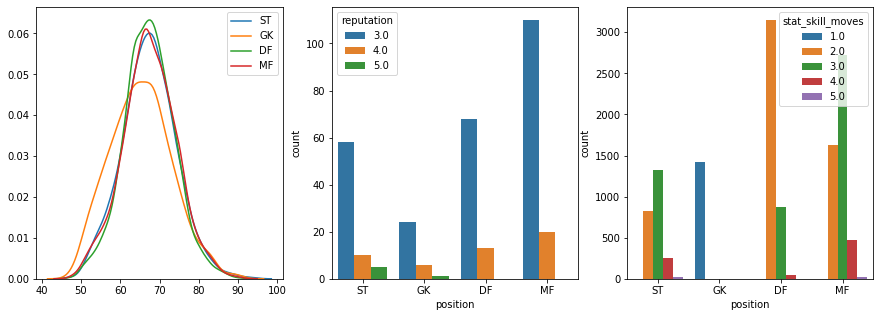

In [17]:
plt.figure(figsize=[15,5])
plt.subplot(1,3,1)
for i in All_df.position.unique():
    sns.kdeplot(All_df.loc[All_df.position == i].stat_overall, label = i)
plt.subplot(1,3,2)
sns.countplot(x = 'position',hue ='reputation', data = All_df.loc[All_df.reputation>2])
plt.subplot(1,3,3)
sns.countplot(x = 'position',hue ='stat_skill_moves', data = All_df)
plt.show()

### reputation & stat_skill_moves

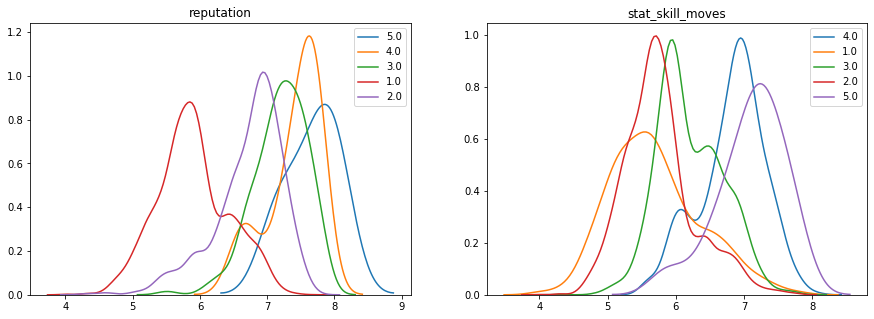

In [18]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
for i in All_df.reputation.unique():
    ax = sns.kdeplot(All_df.loc[All_df.reputation == i].value2, label = i)
ax.set_title("reputation")

plt.subplot(1,2,2)    
for i in All_df.stat_skill_moves.unique():
    ax = sns.kdeplot(All_df.loc[All_df.stat_skill_moves == i].value2, label = i)
ax.set_title("stat_skill_moves")

plt.show()

### contract_until

contranct_until 별로 선수가치를 살펴본 결과 2022~2023계약한 선수들의 가치가 높아 보였다.(2024뒤로는 워낙 수가 작아서 집단간 비교가 어렵다고 판단했다.) 대다수의 선수가 2019~2021 년까지 계약했다.


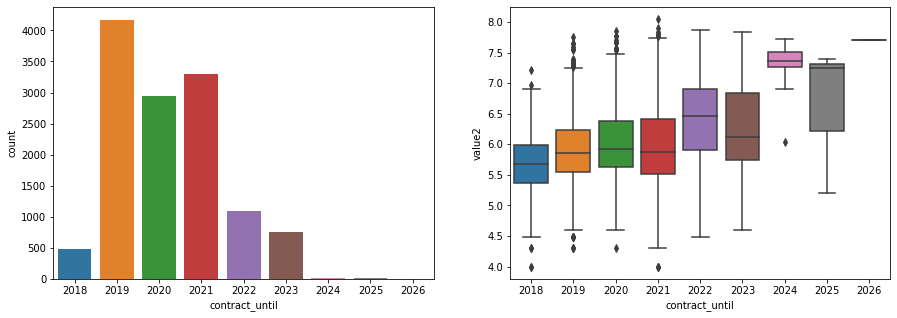

In [19]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
sns.countplot(x = 'contract_until', data = All_df)
plt.subplot(1,2,2)
sns.boxplot(x = "contract_until", y = 'value2', data = All_df)

## FE(Feature Engineering)

**total_stat** = (All_df.stat_potential + All_df.stat_overall)

In [20]:
All_df['rep_skill']=All_df['reputation']+All_df['stat_skill_moves'] # tutorial 에서 얻은 정보입니다 ! 감사합니다
All_df["total_stat"] = (All_df.stat_potential + All_df.stat_overall) # 

### Correlation

FE의 결과로 상관관계 높은 변수가 몇몇 보이나 Tree 기반의 모델은 이를 상관하지 않으므로 제거하지 않고 가져간다.

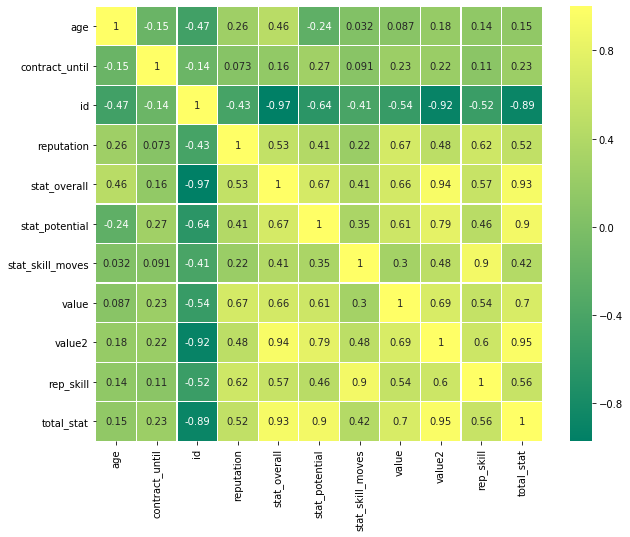

In [21]:
sns.heatmap(All_df.corr(),annot=True,cmap='summer',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## Modeling

In [22]:
All_df.drop(['id', 'name'], axis = 1, inplace = True)

In [23]:
All_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12760 entries, 0 to 3827
Data columns (total 13 columns):
age                 12760 non-null int64
continent           12760 non-null object
contract_until      12760 non-null int64
position            12760 non-null object
prefer_foot         12760 non-null object
reputation          12760 non-null float64
stat_overall        12760 non-null int64
stat_potential      12760 non-null int64
stat_skill_moves    12760 non-null float64
value               8932 non-null float64
value2              8932 non-null float64
rep_skill           12760 non-null float64
total_stat          12760 non-null int64
dtypes: float64(5), int64(5), object(3)
memory usage: 1.7+ MB


### LabelEncoder

contract_until 은 int형 자료이나 연도는 categorical 로 분류돼야 하므로 LabelEncoder 적용했다.

In [24]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
for col in ["continent", 'contract_until', 'position', 'prefer_foot']:    
    All_df[col] = label.fit_transform(All_df[col])

In [25]:
All_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12760 entries, 0 to 3827
Data columns (total 13 columns):
age                 12760 non-null int64
continent           12760 non-null int32
contract_until      12760 non-null int64
position            12760 non-null int32
prefer_foot         12760 non-null int32
reputation          12760 non-null float64
stat_overall        12760 non-null int64
stat_potential      12760 non-null int64
stat_skill_moves    12760 non-null float64
value               8932 non-null float64
value2              8932 non-null float64
rep_skill           12760 non-null float64
total_stat          12760 non-null int64
dtypes: float64(5), int32(3), int64(5)
memory usage: 1.5 MB


### Correlation

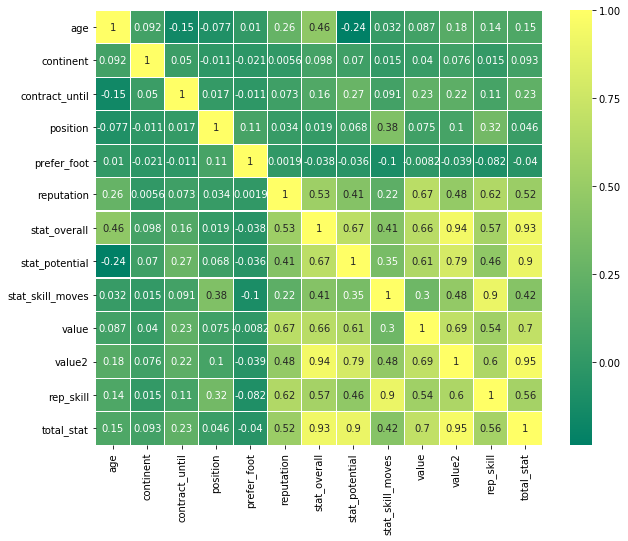

In [26]:
sns.heatmap(All_df.corr(),annot=True,cmap='summer',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

## XGBoost  
https://www.kaggle.com/lifesailor/xgboost <- 모델링 참조 kaggle kernel  
많은 도움이 되었습니다 감사합니다.

In [27]:
# All split into train and test data set
train = All_df.loc[All_df.value.notnull()]
test = All_df.loc[All_df.value.isna()]

In [28]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import metrics 

In [29]:
#set n_estimator
def modelfit(alg, x_train, y_train,useTrainCV=True, cv_folds=5, early_stopping_rounds=100):
   # "alg : model"
    
    # get new n_estimator
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        #xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        xgtrain = xgb.DMatrix(x_train, label=y_train) # numpy.array
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
                          metrics='rmse', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        print(alg)
    
    # Fit the algorithm on the data
    alg.fit(x_train, y_train, eval_metric='rmse')
        
    #Predict training set:
    dtrain_predictions = alg.predict(x_train)
        
    #Print model report:
    print("\nModel Report")
    print("Training Accuracy : %.4g" % metrics.mean_squared_error(y_train, dtrain_predictions))

In [32]:
#기본 XGBoost
xgb1 = XGBRegressor(
    learning_rate =0.2,
    n_estimators=5000,
    max_depth=2,
    min_child_weight=1,
    gamma=0,
    subsample=0.6,
    colsample_bytree=0.6,
    objective= "reg:linear",
    nthread=-1,
    scale_pos_weight=1,
    seed=2018
)
modelfit(xgb1, train.drop(['value','value2'],axis = 1), train['value2'])

[23:46:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=2621,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, 

### 1. max_depth와 min_child_weight를 튜닝한다.

In [31]:
# max_depth : 2, min_child_weigh : 1
param_test1 = {
 'max_depth':range(2,6,1),
 'min_child_weight':range(1,6,1)
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate=0.2, 
                                                  n_estimators=5000, 
                                                  max_depth=5, 
                                                  min_child_weight=2, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= "reg:linear", 
                                                  nthread=-1, 
                                                  scale_pos_weight=1, seed=2018),
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5, verbose=10)
gsearch1.fit(train.drop(['value','value2'],axis = 1), train['value2'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed: 10.7min remaining:   26.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 11.2min finished


[23:12:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([30.4534173 , 30.82982082, 31.35890703, 32.27889628, 33.5927927 ,
         53.70573783, 56.07735271, 58.03824768, 51.15867286, 48.52770138,
         60.23135924, 57.37280092, 55.4010726 , 52.6773551 , 52.34444566,
         68.80563154, 68.65663066, 68.82877102, 69.87497358, 51.1057579 ]),
  'std_fit_time': array([ 0.10095579,  0.37037839,  0.10968318,  0.54514114,  2.09981038,
          0.09076812,  2.01500643,  0.06618033,  1.29368641,  2.21487251,
          0.20141354,  1.44525262,  0.98193402,  0.13857156,  0.21675495,
          0.35305433,  0.35953167,  0.68985508,  0.40045816, 12.57983226]),
  'mean_score_time': array([0.08517189, 0.13484025, 0.12945371, 0.13942657, 0.13703375,
         0.16013255, 0.1582058 , 0.13595619, 0.16615582, 0.18410792,
         0.19208512, 0.16655455, 0.20385561, 0.15478659, 0.16974616,
         0.25711265, 0.21003861, 0.22679367, 0.21203294, 0.19049129]),
  'std_score_time': array([0.02731716, 0.04056337, 0.03720618, 0.04694278,

### 1-1-2. max_depth와 min_child_weight를 추가 튜닝한다.

In [32]:
# max_depth : 2, min_child_weigh : 3
param_test1 = {
 'max_depth':[2,3,4],
 'min_child_weight':[1,2,3]
}
gsearch1 = GridSearchCV(estimator = XGBRegressor(learning_rate=0.1, 
                                                  n_estimators=5000, 
                                                  max_depth=5, 
                                                  min_child_weight=2, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= "reg:linear", 
                                                  nthread=-1, 
                                                  scale_pos_weight=1, seed=2018),
param_grid = param_test1, scoring='neg_mean_squared_error',n_jobs=-1,iid=False, cv=5, verbose=10)
gsearch1.fit(train.drop(['value','value2'],axis = 1), train['value2'])
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:  3.1min remaining:   52.5s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:  3.4min remaining:   25.7s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  3.7min finished


[23:17:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([22.86326785, 24.96744599, 28.2153595 , 39.59672785, 39.12997704,
         38.60497956, 53.79915633, 52.75414925, 39.52093167]),
  'std_fit_time': array([0.10896213, 2.72682911, 0.1419282 , 0.37136019, 0.36191795,
         0.13275245, 0.41944688, 1.76500426, 0.10258489]),
  'mean_score_time': array([0.08497348, 0.1402247 , 0.11967978, 0.14501238, 0.12127557,
         0.15737967, 0.2202107 , 0.1946805 , 0.11070461]),
  'std_score_time': array([0.05608054, 0.07818766, 0.04448029, 0.04498251, 0.03396523,
         0.06003739, 0.04615089, 0.07455029, 0.02200602]),
  'param_max_depth': masked_array(data=[2, 2, 2, 3, 3, 3, 4, 4, 4],
               mask=[False, False, False, False, False, False, False, False,
                     False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 2, 2, 1, 2, 2, 1, 2, 2],
               mask=[False, False, False, False, False, False, False, False,
                     False],


### 1-2. gamma를 튜닝한다

In [30]:
#gamma: 0
param_test2 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch2 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.2, 
                                                  n_estimators=5000, 
                                                  max_depth=2,
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= "reg:linear", 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2018), 
                        param_grid = param_test2, scoring='neg_mean_squared_error', n_jobs=-1, iid=False, cv=5)
gsearch2.fit(train.drop(['value','value2'],axis = 1), train['value2'])
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

[23:35:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([25.90768499, 25.16866064, 27.6536098 , 24.43761621, 24.73143039,
         28.08884721, 26.18254681, 24.61633811, 25.0790998 , 21.65507421]),
  'std_fit_time': array([0.15232571, 0.75193412, 1.72113861, 0.69133696, 1.597781  ,
         0.31560532, 1.78918712, 0.2193446 , 0.15600977, 3.73856361]),
  'mean_score_time': array([0.71827846, 0.14999928, 0.14521418, 0.14381657, 0.14640861,
         0.14521174, 0.13823009, 0.14461336, 0.14042478, 0.10950613]),
  'std_score_time': array([0.10422971, 0.00831075, 0.00689788, 0.00694884, 0.00927895,
         0.00976357, 0.0039696 , 0.00805347, 0.00965721, 0.02284296]),
  'param_gamma': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'gamma': 0.0},
   {'gamma': 0.1},
   {'gamma': 0.2},
   {'gamma': 0.3},
   {'gamma': 0.4},
 

### 1-3. subsample and colsample_bytree를 튜닝한다.

In [31]:
# subsample : 0.5 and colsample_bytree : 0.5
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.1, 
                                                  n_estimators=10000, 
                                                  max_depth=2,
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= "reg:linear", 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2018), 
                        param_grid = param_test3, scoring='neg_mean_squared_error', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch3.fit(train.drop(['value','value2'],axis = 1), train['value2'])
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:  8.9min remaining:   43.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  9.1min finished


[23:45:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([48.59737124, 48.16932259, 47.73947182, 45.10472169, 53.20125866,
         52.27553554, 52.63637056, 48.92849102, 58.02954068, 55.48814011,
         52.31423249, 50.17934422, 59.22653708, 57.21571784, 57.4357296 ,
         53.23876715]),
  'std_fit_time': array([0.18263298, 1.33863879, 0.30219009, 0.27963949, 0.15770265,
         1.65861859, 0.60155822, 1.2389025 , 0.27268074, 0.41706473,
         0.5300395 , 0.29359579, 0.5861208 , 1.54060061, 1.1085184 ,
         2.55920488]),
  'mean_score_time': array([2.28548517, 1.81474466, 1.9834938 , 1.38110528, 1.6230649 ,
         1.53210211, 1.41461558, 1.49978757, 1.31109147, 1.57518616,
         1.36474886, 1.39586549, 1.32565336, 1.53269958, 1.35357833,
         1.11862521]),
  'std_score_time': array([0.15524392, 0.14799664, 0.2143996 , 0.19460946, 0.22000154,
         0.26079538, 0.25595047, 0.19515592, 0.18740765, 0.09004409,
         0.25660425, 0.17412205, 0.232182  , 0.29328299, 0.19910803,
         0.259264

### 1-4. subsample, colsample_bytree 추가 튜닝하기

In [33]:
# subsample : 0.65 colsample_bytree : 0.5
param_test4 = {
 'subsample':[i/100.0 for i in range(50,70, 5)],
 'colsample_bytree':[i/100.0 for i in range(50,70,5)]
}

gsearch4 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.2, 
                                                  n_estimators=10000, 
                                                  max_depth=2,
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.6, 
                                                  colsample_bytree=0.6,
                                                  objective= "reg:linear", 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2018), 

                        param_grid = param_test4, scoring='neg_mean_squared_error', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch4.fit(train.drop(['value','value2'],axis = 1), train['value2'])
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  74 out of  80 | elapsed:  8.8min remaining:   42.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  9.0min finished


[23:59:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([51.85765452, 50.70812998, 45.87924895, 45.62632513, 49.60707498,
         50.02176504, 49.48121223, 48.56406631, 52.85179377, 53.24534073,
         52.24421945, 51.48564863, 54.61926455, 53.69015107, 53.86867313,
         53.49607091]),
  'std_fit_time': array([2.41679004, 3.87362738, 0.10582822, 0.25943664, 0.11574808,
         0.28647261, 0.09318433, 0.11574735, 0.84274059, 0.44456268,
         0.11099501, 0.27044426, 0.6270941 , 0.25503704, 1.02196444,
         0.32347666]),
  'mean_score_time': array([1.4375536 , 1.50497293, 1.56142325, 1.43954897, 1.5588304 ,
         1.38848538, 1.52292538, 1.50098391, 1.15650659, 1.42618489,
         1.34041424, 1.31228967, 1.44852533, 1.28037481, 1.5755857 ,
         1.4413445 ]),
  'std_score_time': array([0.24096646, 0.25927027, 0.05119955, 0.2075581 , 0.32196824,
         0.16574723, 0.33575586, 0.21215249, 0.15114517, 0.2834217 ,
         0.14335051, 0.22171277, 0.25516129, 0.18183666, 0.12823435,
         0.239499

###### 1-5. Regularization Parameter 튜닝

In [35]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch5 = GridSearchCV(estimator = XGBRegressor(learning_rate =0.2, 
                                                  n_estimators=5000, 
                                                  max_depth=2,
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.65, 
                                                  colsample_bytree=0.5,
                                                  objective= "reg:linear", 
                                                  thread=-1, 
                                                  scale_pos_weight=1,
                                                  seed=2018), 
                        param_grid = param_test5, scoring='neg_mean_squared_error', n_jobs=-1, iid=False, cv=5, verbose=10)
gsearch5.fit(train.drop(['value','value2'],axis = 1), train['value2'])
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done  13 out of  25 | elapsed:   47.9s remaining:   44.2s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:   48.1s remaining:   27.0s
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.0min remaining:   19.7s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:  1.1min remaining:    9.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.2min finished


[00:04:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'mean_fit_time': array([23.42053246, 23.21349287, 22.63384571, 21.04450302, 13.5693018 ]),
  'std_fit_time': array([0.13902865, 0.42950603, 0.10180246, 0.41392419, 1.64887524]),
  'mean_score_time': array([0.84134846, 0.79307652, 0.81501737, 0.45697751, 0.12167425]),
  'std_score_time': array([0.17906623, 0.19799501, 0.11699019, 0.05609035, 0.01874468]),
  'param_reg_alpha': masked_array(data=[1e-05, 0.01, 0.1, 1, 100],
               mask=[False, False, False, False, False],
         fill_value='?',
              dtype=object),
  'params': [{'reg_alpha': 1e-05},
   {'reg_alpha': 0.01},
   {'reg_alpha': 0.1},
   {'reg_alpha': 1},
   {'reg_alpha': 100}],
  'split0_test_score': array([-0.09354946, -0.09710153, -0.10320264, -0.11699659, -0.45349738]),
  'split1_test_score': array([-0.01326028, -0.01341459, -0.01402939, -0.01507079, -0.02453195]),
  'split2_test_score': array([-0.00160459, -0.00153607, -0.00124338, -0.00189802, -0.0159851 ]),
  'split3_test_score': array([-0.00237687, -0

### 1-6 learning_rate 감소

In [36]:
import time
start = time.time()  # 시작 시간 저장

xgb1 = XGBRegressor(
    learning_rate =0.01,
    n_estimators=50000,
    max_depth=2,
    min_child_weight=1,
    gamma=0,
    reg_alpha=0.01,
    subsample=0.65,
    colsample_bytree=0.5,
    objective= 'reg:linear',
    nthread=-1,
    scale_pos_weight=1,
    seed=2018
)
modelfit(xgb1, train.drop(['value','value2'],axis = 1), train['value2'])

 
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[00:05:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:05:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:05:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:05:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:05:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=36546,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=0.01, reg_lambda=1, scale_pos_weigh

### Feature Importance  
stat 관련한  feature이 많이 중요 헀고 그 뒤로는 rep_skill 관련 feature이 많이 중요했다.

Text(0.5, 1.0, 'Feature Importance')

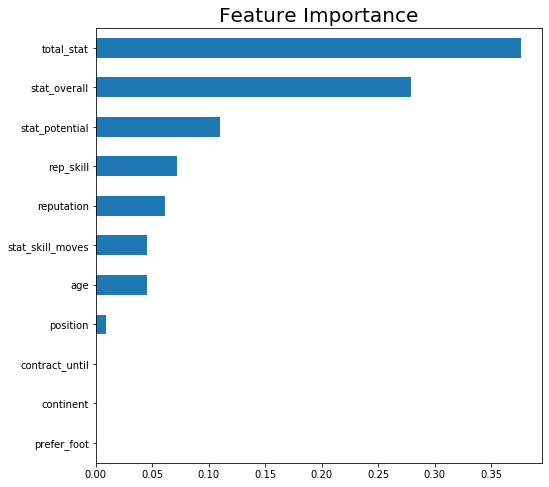

In [37]:
plt.figure(figsize=(8,8))
pd.Series(xgb1.feature_importances_,train.drop(['value','value2'], axis = 1).columns).sort_values(ascending=True).plot.barh()
plt.title('Feature Importance', fontsize = 20)

### Submission  

In [38]:
submission = pd.DataFrame({'id': test_id , 'value' : 10**xgb1.predict(test.drop(['value','value2'], axis = 1))})
submission.to_csv('submission.csv', index = False)

- 확인결과 log 로 예측하는것이 시간은 더 걸리나 정확도는 더 많이개선 됬다.
- Ranking에 있는 점수는 우연히 찾은 parameter에 의한 값(생각보다 parameter에 따라 Ranking점수가 많이 달라졌다.)
- 상관관계 높은 변수들 제거하면 오히려 score가 안 좋아졌다.